In [1]:
library(readr)
data<-read_csv('ageinc_g.csv')

New names:
• `` -> `...1`
Rows: 1000 Columns: 4
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): gender
dbl (3): ...1, income, age

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [2]:
#2. In thông tin dữ liệu: head(), số dòng, số cột, summary().
head(data)
nrow(data)
ncol(data)
summary(data)

...1,income,age,gender
<dbl>,<dbl>,<dbl>,<chr>
0,101743,58,Female
1,49597,27,Female
2,36517,52,Male
3,33223,49,Male
4,72994,53,Female
5,38361,26,Female


[1] 1000

[1] 4

      ...1           income            age           gender         
 Min.   :  0.0   Min.   :     0   Min.   :18.00   Length:1000       
 1st Qu.:249.8   1st Qu.: 46402   1st Qu.:30.00   Class :character  
 Median :499.5   Median : 78994   Median :39.00   Mode  :character  
 Mean   :499.5   Mean   : 80117   Mean   :39.41                     
 3rd Qu.:749.2   3rd Qu.:114811   3rd Qu.:49.00                     
 Max.   :999.0   Max.   :179294   Max.   :63.00                     

In [3]:
data = subset(data, select = c(income,age,gender) )

Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.1, built: 2022-11-18)
## Copyright (C) 2005-2022 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 

Warning message:
"Unknown or uninitialised column: `arguments`."
Warning message:
"Unknown or uninitialised column: `arguments`."
Warning message:
"Unknown or uninitialised column: `imputations`."


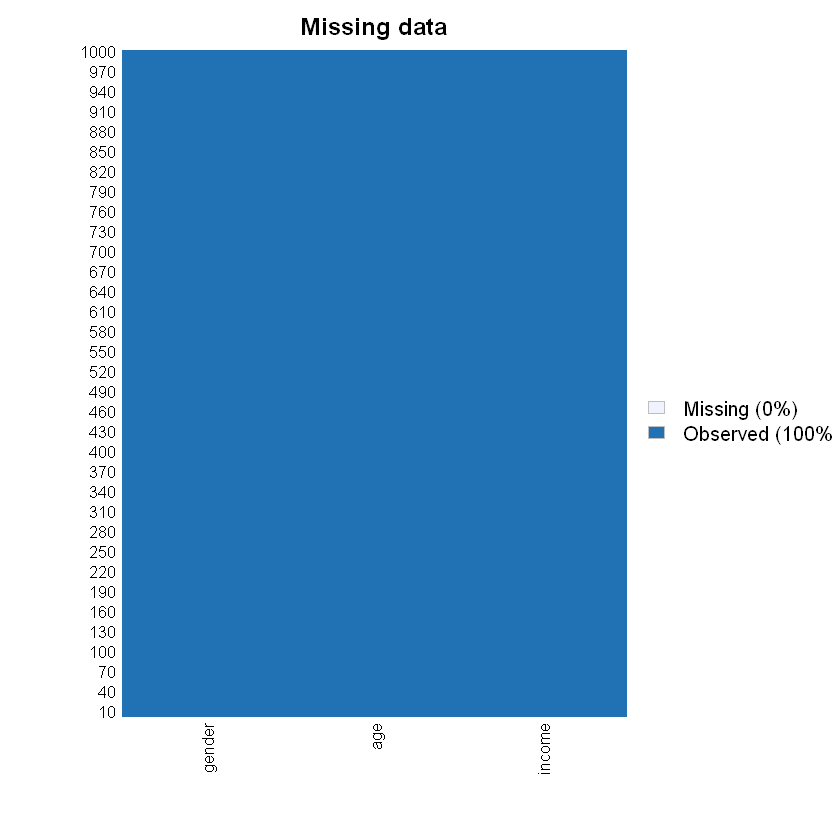

In [4]:
library("Amelia")
missmap(data,main='Missing data')

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ dplyr   1.0.10
✔ tibble  3.1.8      ✔ stringr 1.4.1 
✔ tidyr   1.2.1      ✔ forcats 0.5.2 
✔ purrr   0.3.5      
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


75% 
217422.9

25% 
-56210.12

number of oulier: 0

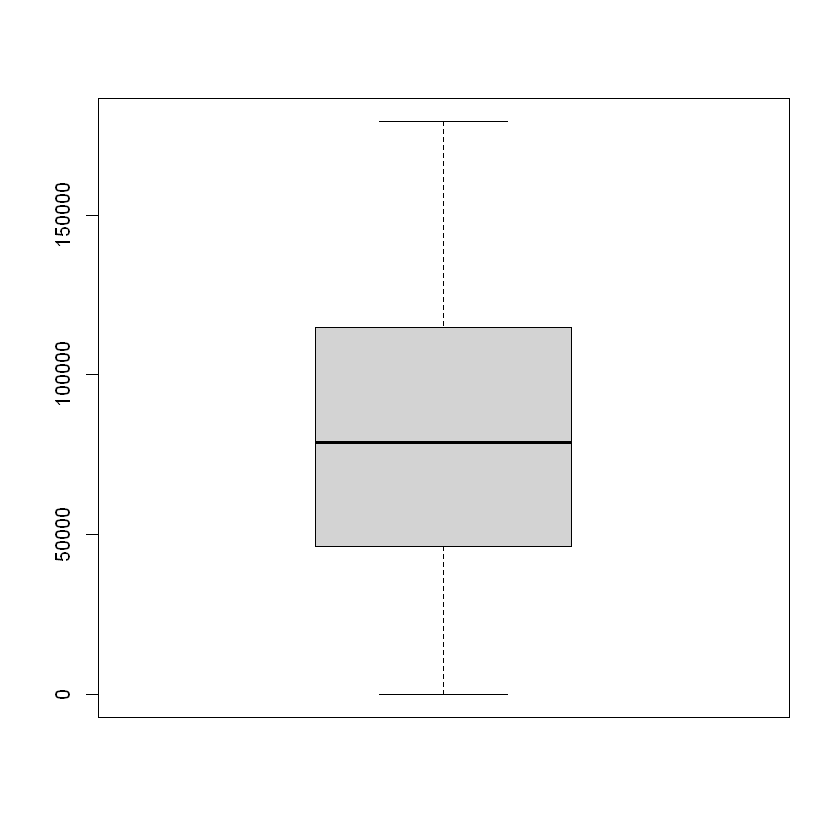

In [5]:
library(tidyverse)
lowerq = quantile(data$income)[2]
upperq = quantile(data$income)[4]
iqr = upperq - lowerq
extreme.threshold.upper = (iqr * 1.5) + upperq
extreme.threshold.lower = lowerq - (iqr * 1.5)
extreme.threshold.upper
extreme.threshold.lower
cat('number of oulier:',nrow(data %>% filter(data$income>217422.875)))
boxplot(data$income)

75% 
77.5

25% 
1.5

number of oulier: 0

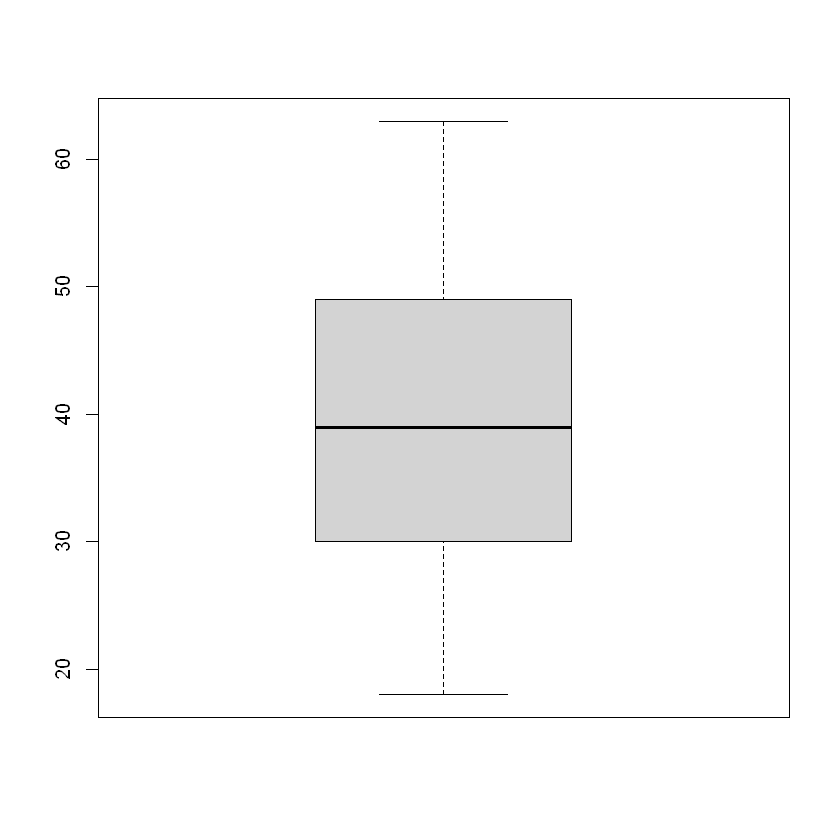

In [6]:
library(tidyverse)
lowerq = quantile(data$age)[2]
upperq = quantile(data$age)[4]
iqr = upperq - lowerq
extreme.threshold.upper = (iqr * 1.5) + upperq
extreme.threshold.lower = lowerq - (iqr * 1.5)
extreme.threshold.upper
extreme.threshold.lower
cat('number of oulier:',nrow(data %>% filter(data$age>77.5)))
boxplot(data$age)

In [7]:
normalize <- function(x, na.rm = TRUE) {
    return((x- min(x)) /(max(x)-min(x)))
}
data$income=normalize(data$income)
data$age=normalize(data$age)

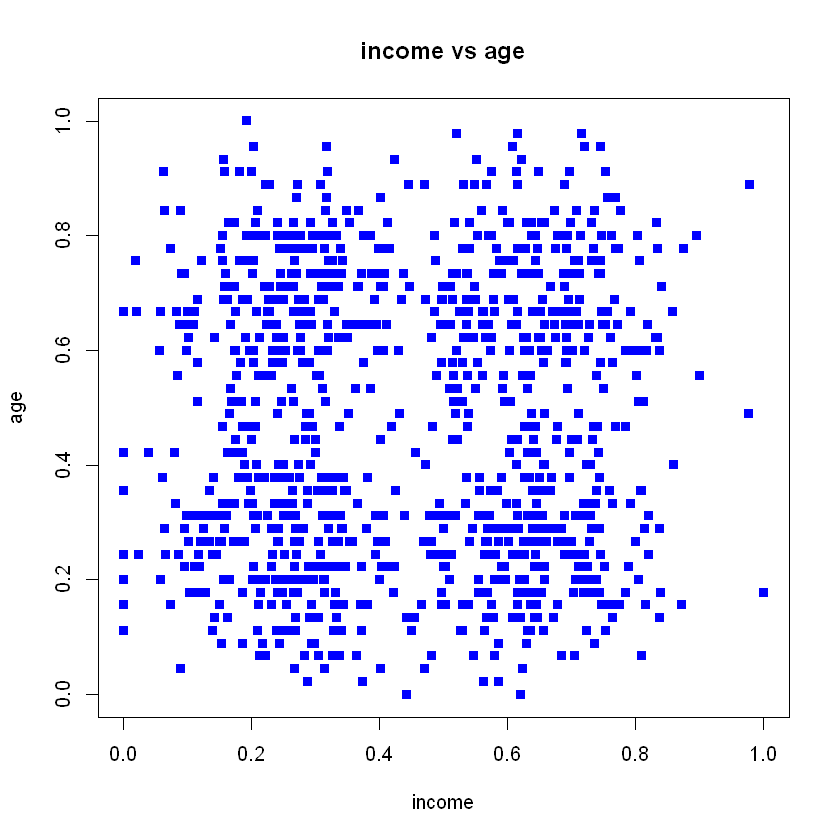

In [8]:
#4. Vẽ hình để xem xét mối liên hệ giữa các thuộc tính. Cho nhận xét dựa trên biểu đồ.
plot(x=data$income,y=data$age,
    xlab='income',ylab='age',
    main='income vs age',pch=15,col='blue')

biểu đồ mối quan hệ giữa age và income tương đối phân cụm

Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"


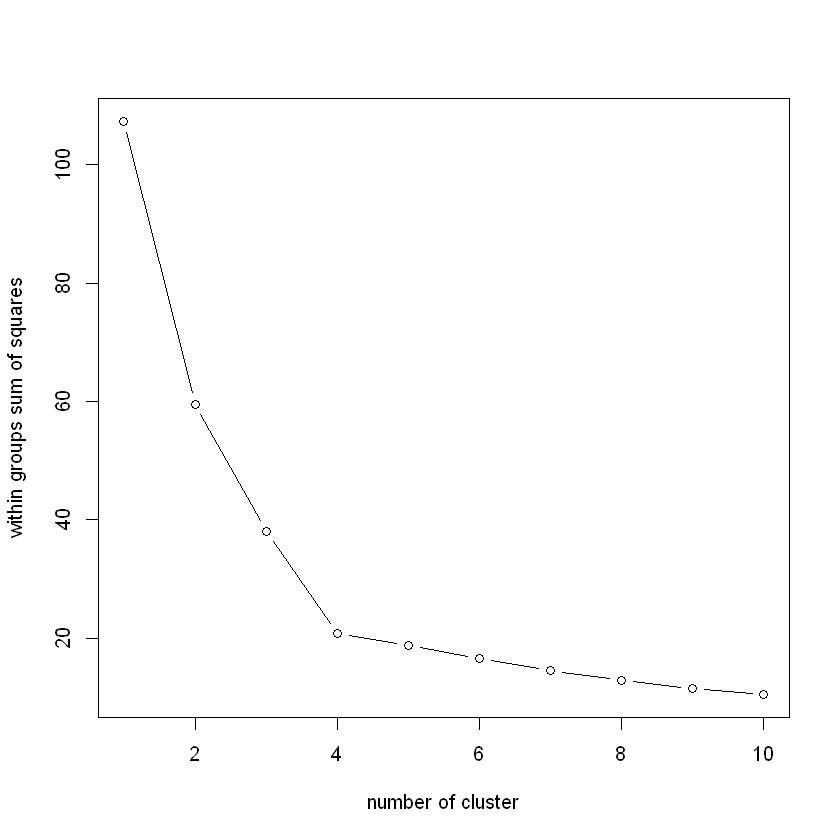

In [9]:
mydata<-data
wss<-(nrow(mydata)-1)*sum(apply(mydata,2,var))
for (i in 1:10) wss[i]<-sum(kmeans(mydata[,1:2],centers=i)$withinss)
plot(1:10,wss,type='b',xlab='number of cluster',ylab='within groups sum of squares')

In [10]:
set.seed(20)
dataCluster<-kmeans(mydata[,1:2],4,nstart=20)
print(dataCluster)

K-means clustering with 4 clusters of sizes 248, 258, 238, 256

Cluster means:
     income       age
1 0.2437294 0.2583333
2 0.6425798 0.2610680
3 0.6480967 0.6977591
4 0.2592522 0.6964410

Clustering vector:
   [1] 3 1 4 4 4 1 1 2 1 4 1 1 1 3 3 4 2 2 1 4 1 2 3 3 1 2 3 1 3 2 1 1 1 2 2 2 1
  [38] 1 4 3 4 4 3 2 2 2 3 3 2 1 2 4 3 1 4 1 1 1 2 1 3 4 2 2 1 2 4 2 3 2 4 2 2 3
  [75] 4 4 1 2 2 3 3 1 2 4 2 4 4 4 4 2 4 1 4 2 1 1 2 4 4 4 1 2 4 3 4 1 2 4 4 4 1
 [112] 3 3 1 2 4 3 2 1 4 3 1 2 1 4 1 2 1 1 3 2 1 4 2 3 4 2 1 3 1 4 1 4 2 1 4 3 2
 [149] 2 1 2 1 2 4 1 1 2 1 2 3 3 2 3 2 3 1 1 3 2 1 2 4 2 3 4 4 3 3 2 2 4 1 2 1 3
 [186] 2 2 3 3 2 2 4 1 1 1 1 3 2 3 4 3 4 4 1 4 3 3 4 4 4 4 4 3 3 4 1 2 1 3 4 2 2
 [223] 1 2 2 3 4 1 4 3 3 4 3 2 1 2 1 3 1 3 3 4 1 2 4 3 3 1 1 2 1 1 1 4 4 4 2 2 3
 [260] 2 2 1 3 2 1 3 3 1 2 4 4 2 1 3 3 3 1 1 3 3 3 2 1 3 2 3 4 1 4 1 1 4 3 2 1 2
 [297] 4 2 3 1 2 4 2 3 1 4 4 2 1 4 2 2 4 4 4 1 2 1 3 4 4 1 3 4 4 1 3 4 4 4 4 1 2
 [334] 2 4 1 1 1 3 3 1 2 2 4 4 1 3 1 4 1 3 1 3 3 2 2 4 2 3 4 3

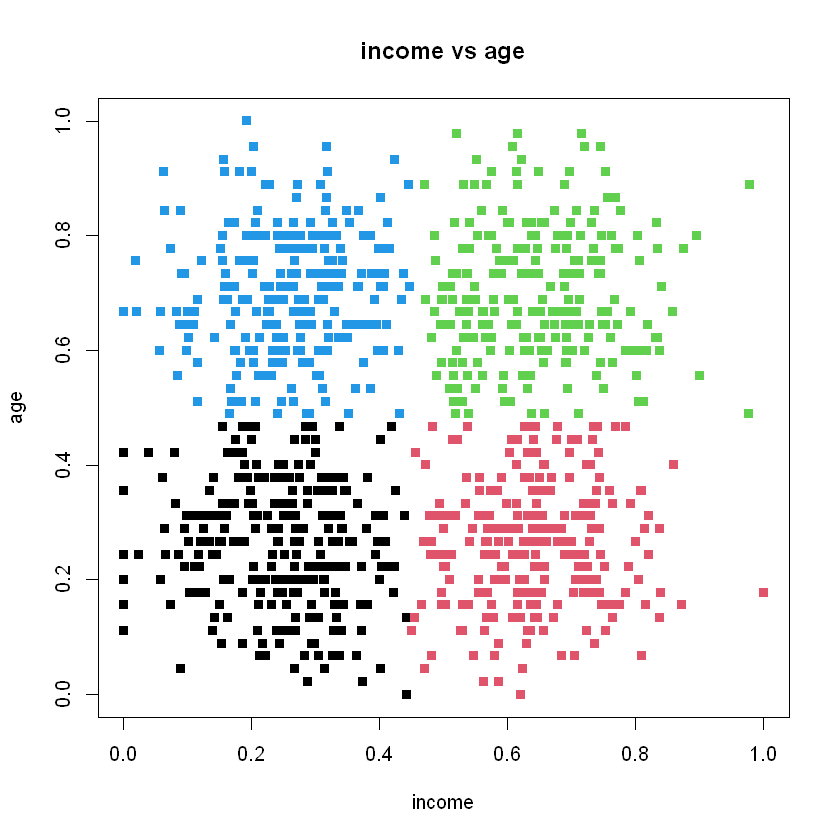

In [11]:
#6. Tìm kết quả => có bao nhiêu cụm => mẫu nào thuộc cụm nào?
dataCluster$cluster<-as.factor(dataCluster$cluster)
plot(x=mydata$income,y=mydata$age,,xlab='income',ylab='age',main='income vs age',col=dataCluster$cluster,pch=15)

In [12]:
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



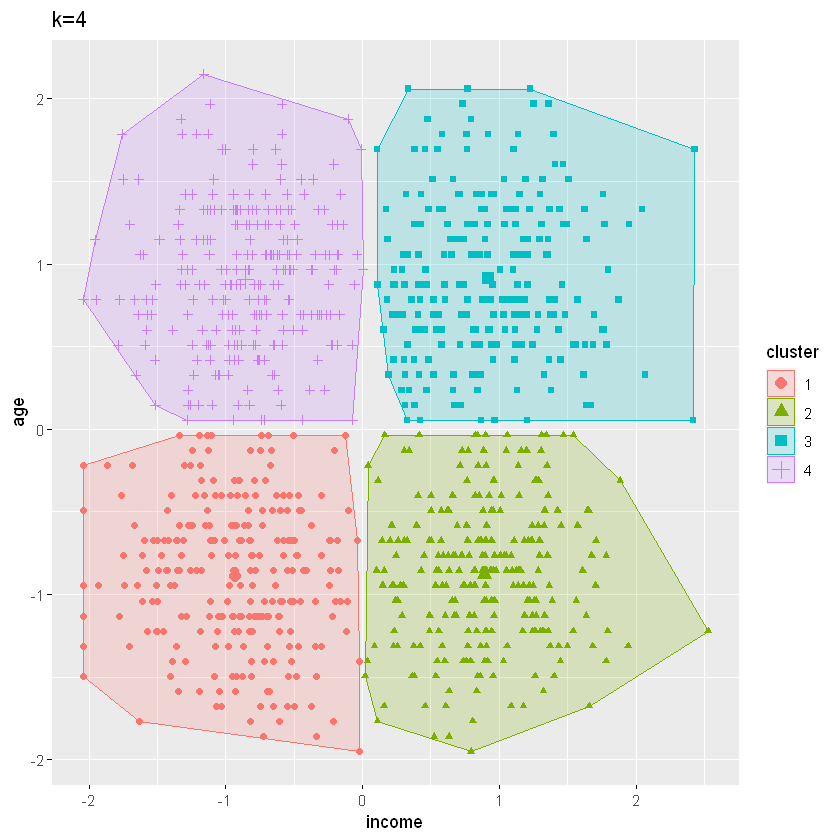

In [13]:
fviz_cluster(dataCluster,geom='point',data=mydata[,1:2])+ggtitle('k=4')

Nhận xét: thuật toán phân được 4 cụm rõ ràng